<a href="https://colab.research.google.com/github/SylGrafe/lab1Repo/blob/master/colab_CNN01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

colab_CNN01  , testing  strides padding adn window size,
more explanations at:

https://github.com/SylGrafe/lab1Repo/blob/master/lab1Sygr0003.pdf

fatal: destination path 'lab1Lib' already exists and is not an empty directory.
train  model s2_same for fashion MNIST classification
10000/10000 [==============================] - 1s 102us/step

************* testRes:[0.28778649337887763, 0.8974] ************ 

saving on colab_CNN01.json  the model config and  results 
(colab_CNN01 s2_same at:2803_1206 
testRes:[0.2878, 0.8974]
compInfo: adam, categorical_crossentropy
info: strides ,padding for wind: wind55

{'val_loss': [0.3789, 0.3006, 0.2711, 0.2492, 0.2518, 0.2523], 'val_acc': [0.8602, 0.8845, 0.8995, 0.9065, 0.9078, 0.9077], 'loss': [0.5219, 0.3386, 0.2853, 0.2551, 0.2261, 0.2048], 'acc': [0.8121, 0.8767, 0.8946, 0.9051, 0.9151, 0.9227]}
{'batch_size': 64, 'epochs': 6, 'steps': None, 'samples': 54000, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}) 


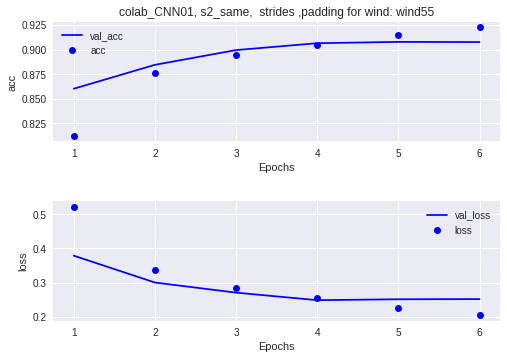

************ dumpOnFile () : append to file  colab_CNN01.json  

 Dumping object s2_same in the file  colab_CNN01.json 
 _2803_120652 duration: h:0 mn:0 sec:50 


In [23]:
import keras
import numpy as np
keras.__version__
import sys
import datetime
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import layers
from keras import models

# lab1Utils.py is expected to be in the 
# https://github.com/SylGrafe/lab1Lib.git
!git clone https://github.com/SylGrafe/lab1Lib.git
import sys
sys.path.insert(0, "lab1Lib")
import lab1Utils


CAndR = lab1Utils.ConfigAndResults

# s2_same , s2_valid , s1_same , s1_valid

optimizerStr = 'adam'


lossStr = 'categorical_crossentropy'
theDumpFileName = "colab_CNN01.json"
codeRef="colab_CNN01"
compInfoStr= optimizerStr + ", " + lossStr
startTime= datetime.datetime.now()
# after 6 epochs the model seem to overfit
myEpochs=6
myBs=64

windSize="wind55"
modelStruct="s2_same"
if (windSize == "wind33" ):
  myWind=(3,3)
elif (windSize == "wind55" ):
  myWind=(5,5)

else:
  print ("**** error :%s invalid windSize****" %(windSize) )
  sys.exit(1)

infoStr= " strides ,padding for wind: %s" % (windSize)

theModel = models.Sequential()



if (modelStruct == "s1_valid" ):
  myStrides=1
  myPadding='valid' 
  theModel.add(layers.Conv2D(32, myWind,  
                             strides=myStrides , padding=myPadding , 
                           activation='relu', input_shape=(28, 28, 1)))
  theModel.add(layers.MaxPooling2D((2, 2)))
  theModel.add(layers.Conv2D(64, myWind, activation='relu', 
                           strides=myStrides , padding=myPadding)) 
  theModel.add(layers.MaxPooling2D((2, 2)))
  theModel.add(layers.Conv2D(64, myWind, activation='relu'))

elif (modelStruct == "s1_same" ):
  myStrides=1
  myPadding='same' 
  theModel.add(layers.Conv2D(32, myWind,  
                             strides=myStrides , padding=myPadding , 
                           activation='relu', input_shape=(28, 28, 1)))
  theModel.add(layers.MaxPooling2D((2, 2)))
  theModel.add(layers.Conv2D(64, myWind, activation='relu', 
                           strides=myStrides , padding=myPadding))
  theModel.add(layers.MaxPooling2D((2, 2)))
  theModel.add(layers.Conv2D(64, myWind, activation='relu'))

  
  
elif (modelStruct == "s2_same" ):
  myStrides=2
  myPadding='same' 
  # when  strides=2 do not use  MaxPooling layers
  theModel.add(layers.Conv2D(32, myWind,  
                             strides=myStrides , padding=myPadding , 
                           activation='relu', input_shape=(28, 28, 1))) 
  theModel.add(layers.Conv2D(64, myWind, activation='relu', 
                           strides=myStrides , padding=myPadding))
  theModel.add(layers.Conv2D(64, myWind, activation='relu'))

  
elif (modelStruct == "s2_valid" ):
  myStrides=2
  myPadding='valid' 
  # when  strides=2 do not use  MaxPooling layers
  theModel.add(layers.Conv2D(32, myWind,  
                             strides=myStrides , padding=myPadding , 
                           activation='relu', input_shape=(28, 28, 1))) 
  theModel.add(layers.Conv2D(64, myWind, activation='relu', 
                           strides=myStrides , padding=myPadding))
  theModel.add(layers.Conv2D(64, myWind, activation='relu'))
else:
  print ("**** fatal invalid modelStruct****")
  sys.exit(1)
 
  
  
theModel.add(layers.Flatten())
theModel.add(layers.Dense(64, activation='relu'))
theModel.add(layers.Dense(10, activation='softmax'))


#theModel.summary()



(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# shuffle the training dataset (5 times!)
for _ in range(5): 
    indexes = np.random.permutation(len(train_images))

train_images = train_images[indexes]
train_labels = train_labels[indexes]

# now set-aside 10% of the train_images/labels as the
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_images))

# first pick validation set from train_images/labels
val_data = train_images[:val_count,:]
val_labels = train_labels[:val_count,:]

# leave rest in training set
train_images2 = train_images[val_count:,:]
train_labels2 = train_labels[val_count:,:]


theModel.compile(optimizer=optimizerStr,
              loss=lossStr,
              metrics=['accuracy'])


print ("train  model %s for fashion MNIST classification" % modelStruct )

theFit= theModel.fit (train_images2, train_labels2, 
    epochs=myEpochs , verbose=0, batch_size=myBs,   
    validation_data=(val_data, val_labels))


              
testRes = theModel.evaluate(test_images, test_labels)
print ("\n************* testRes:%s ************ \n" % (  testRes))



# save the results on disk
print ("saving on %s  the model config and  results " % (theDumpFileName))

res= CAndR (modelStruct ,compInfoStr , theFit.history ,  theFit.params , 
 startTime.strftime("%d%m_%H%M")  , testRes= testRes , 
            codeRef=codeRef , info=infoStr)


print(res.toString())
lab1Utils.plotHist (res )



lab1Utils.dumpOnFile (res , theDumpFileName)




stopTime = datetime.datetime.now()
duration = stopTime - startTime
seconds = duration.total_seconds()
hours = seconds // 3600
minutes = (seconds % 3600) // 60
seconds = seconds % 60
theName =  stopTime.strftime("_%d%m_%H%M%S") 
print ( " %s duration: h:%d mn:%d sec:%d " % 
(   theName , hours , minutes , seconds))



In [0]:
from google.colab import files
files.download(theDumpFileName)



In [15]:
!ls colab_CNN01.json

ls: cannot access 'colab_CNN01.json': No such file or directory


end notebook